In [43]:

import pandas as pd
import json

# Replace 'your_file_name.csv' with the path to your CSV file
file_name = 'all_pairvote_log_wgpt.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Define a function to parse JSON data
def parse_json(data):
    try:
        # Parse the JSON data
        return json.loads(data)
    except ValueError as e:
        # Return None or an empty dictionary if the data cannot be parsed
        return None

# Apply the parse_json function to the 'models' and 'states' columns
df['models'] = df['models'].apply(parse_json)
df['states'] = df['states'].apply(parse_json)
# row["states"][0]['messages'][0][1]

# Now df contains the parsed JSON data in the 'models' and 'states' columns
# print(df.head())
print(len(df))
# filter_vote_df = df[df["gpt_vote"].isin(["leftvote", "rightvote"])]#, "tievote", "bothbad_vote"
# \#1
filter_vote_df = df[df["gpt_vote"].isin(["leftvote", "rightvote", "tievote", "bothbad_vote"])]
# \#2
# filter_vote_df = df
filter_vote_df.loc[~filter_vote_df["gpt_vote"].isin(["leftvote", "rightvote"]), "gpt_vote"] = "tie"
filter_vote_df.loc[~filter_vote_df["type"].isin(["leftvote", "rightvote"]), "type"] = "tie"
# \#3
#[df["gpt_vote"].isin(["leftvote", "rightvote"]) & df["type"].isin(["leftvote", "rightvote"])]
filtered_df = filter_vote_df[filter_vote_df["states"].apply(lambda x: len(x[0]['messages'][0][1]) > 10)]
print(len(filtered_df))


1338
1044


In [44]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Assuming df is your DataFrame

# True labels
y_true = filtered_df["type"]

# Predictions
y_pred = filtered_df["gpt_vote"]

# Compute the confusion matrix
# conf_matrix = confusion_matrix(y_true, y_pred, labels=["leftvote", "rightvote", "tievote", "bothbad_vote"])
conf_matrix = confusion_matrix(y_true, y_pred, labels=["leftvote", "rightvote", "tie"])

# Compute the accuracy
accuracy = accuracy_score(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy:", accuracy)


Confusion Matrix:
[[300  61  34]
 [102 269  27]
 [ 99 111  41]]

Accuracy: 0.5842911877394636


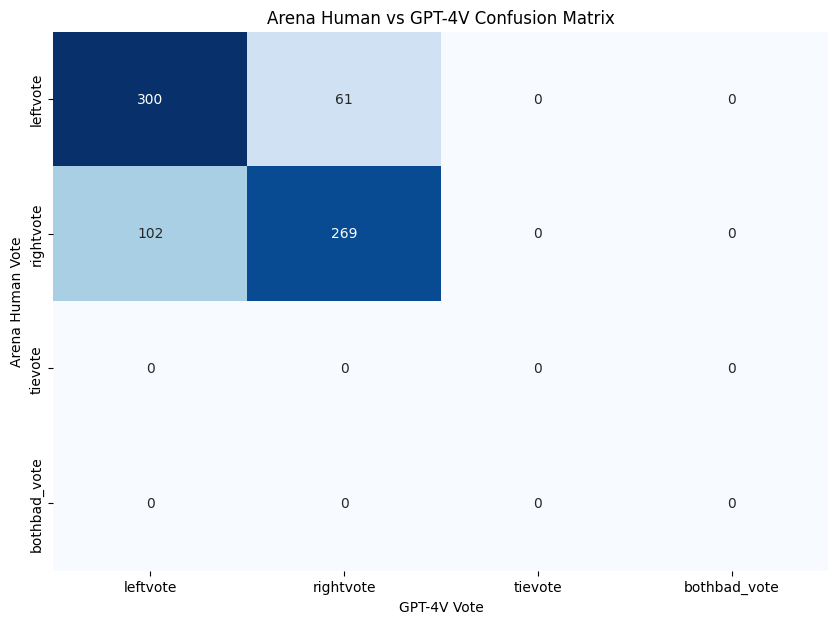

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming df is your DataFrame

# True labels and predictions
y_true = filtered_df["type"]
y_pred = filtered_df["gpt_vote"]

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=["leftvote", "rightvote", "tievote", "bothbad_vote"])

# Create a pandas DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["leftvote", "rightvote", "tievote", "bothbad_vote"], columns=["leftvote", "rightvote", "tievote", "bothbad_vote"])

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Arena Human vs GPT-4V Confusion Matrix")
plt.xlabel("GPT-4V Vote")
plt.ylabel("Arena Human Vote")
plt.show()


In [46]:
from sklearn.metrics import accuracy_score, f1_score

# Assuming df is your DataFrame and it contains 'type' as true labels and 'gpt_vote' as predictions
y_true = filtered_df['type']
y_pred = filtered_df['gpt_vote']

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate F1 score, here using 'macro' average to treat all classes equally
f1 = f1_score(y_true, y_pred, average='macro')
print(f'F1 Score (Macro): {f1}')

# If you want to calculate F1 score with other averages, for example 'micro' or 'weighted', you can do:
f1_micro = f1_score(y_true, y_pred, average='micro')
print(f'F1 Score (Micro): {f1_micro}')

f1_weighted = f1_score(y_true, y_pred, average='weighted')
print(f'F1 Score (Weighted): {f1_weighted}')

Accuracy: 0.5842911877394636
F1 Score (Macro): 0.514392348541452
F1 Score (Micro): 0.5842911877394636
F1 Score (Weighted): 0.5536668839130223


In [47]:
from sklearn.metrics import cohen_kappa_score

# Assuming df is your DataFrame and it contains 'type' as true labels and 'gpt_vote' as predictions
y_true = filtered_df['type']
y_pred = filtered_df['gpt_vote']

# Calculate Cohen's Kappa score
kappa = cohen_kappa_score(y_true, y_pred)
print(f'Cohen\'s Kappa Score: {kappa}')


Cohen's Kappa Score: 0.3442144615665177


In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy Score: {accuracy}')


Accuracy Score: 0.5842911877394636


In [49]:
import pandas as pd

# Assuming filtered_df is your DataFrame and it contains 'type' and 'gpt_vote' columns
# Convert 'type' and 'gpt_vote' to categorical codes
filtered_df['type_int'] = pd.factorize(filtered_df['type'])[0]
filtered_df['gpt_vote_int'] = pd.factorize(filtered_df['gpt_vote'])[0]

# Now you can calculate Pearson correlation between these new integer columns
pearson_correlation = filtered_df['type_int'].corr(filtered_df['gpt_vote_int'])
print(f'Pearson Correlation Coefficient: {pearson_correlation}')


Pearson Correlation Coefficient: 0.2880096104357029
